In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, linregress

import os
import time
import itertools

from glove.model import *

from sklearn.model_selection import KFold

In [2]:
# import file names
files = os.listdir("data/")
files = [f for f in files if "processed_mono.csv" in f]
files

['MS014_processed_mono.csv',
 'MS001_processed_mono.csv',
 'MS008_processed_mono.csv',
 'DSM_processed_mono.csv']

# fit gLV models

In [3]:
def predict_df(df, species):
    
    # save measured and predicted values
    exp_names = []
    pred_species = []
    pred = []
    stdv = []
    true = []

    # pull just the community data
    test_data = process_df(df, species) 

    # plot the results
    for exp, t_span, Y_m in test_data:

        # predict 
        Y_p, Y_std = model.predict(Y_m, t_span)
        
        # set NaN to zero
        Y_p = np.nan_to_num(Y_p)
        Y_std = np.nan_to_num(Y_std)
        
        ### prediction results for species that were present ###
        inds_present = Y_m[0] > 0 
        exp_names.append([exp]*sum(inds_present)*(Y_m.shape[0]-1))
        pred_species.append(np.tile(np.vstack(species)[inds_present], Y_m.shape[0]-1).T.ravel())
        true.append(Y_m[1:,inds_present].ravel())
        pred.append(Y_p[1:,inds_present].ravel())
        stdv.append(Y_std[1:,inds_present].ravel())
                
    # concatenate list
    exp_names = np.concatenate(exp_names)
    pred_species = np.concatenate(pred_species)
    true = np.concatenate(true)
    pred = np.concatenate(pred)
    stdv = np.concatenate(stdv)
        
    return exp_names, pred_species, true, pred, stdv

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Total samples: 62, Initial regularization: 1.00e-03
Loss: 8.373, Residuals: -0.398
Loss: 4.302, Residuals: 0.155
Loss: 3.703, Residuals: 0.066
Loss: 2.680, Residuals: 0.055
Loss: 2.037, Residuals: 0.039
Loss: 1.716, Residuals: 0.004
Loss: 1.592, Residuals: 0.032
Loss: 1.497, Residuals: 0.011
Loss: 1.383, Residuals: 0.004
Loss: 1.376, Residuals: 0.013
Loss: 1.363, Residuals: 0.010
Loss: 1.341, Residuals: 0.005
Loss: 1.337, Residuals: 0.005
Loss: 1.329, Residuals: 0.003
Loss: 1.315, Residuals: -0.001
Loss: 1.314, Residuals: 0.003
Loss: 1.305, Residuals: -0.001
Loss: 1.290, Residuals: -0.006
Loss: 1.290, Residuals: -0.004
Loss: 1.288, Residuals: -0.005
Loss: 1.283, Residuals: -0.007
Loss: 1.281, Residuals: -0.008
Loss: 1.276, Residuals: -0.010
Loss: 1.276, Residuals: -0.008
Loss: 1.273, Residuals: -0.010
Loss: 1.268, Residuals: -0.013
Loss: 1.268, Residuals: -0.013
Loss: 1.266, Residuals: -0.014
Loss: 1.263, Residuals: -0.016
Loss: 1.262, Residuals: -0.015
Loss: 1.258, Residuals: -0.017
L

Loss: 250.929, Residuals: -0.005
Loss: 250.922, Residuals: -0.005
Optimization terminated successfully.
Evidence 1064.218
Pass count  1
Total samples: 63, Initial regularization: 1.00e-03
Loss: 8.295, Residuals: -0.395
Loss: 3.845, Residuals: 0.047
Loss: 3.624, Residuals: 0.025
Loss: 3.201, Residuals: 0.023
Loss: 2.423, Residuals: 0.022
Loss: 1.882, Residuals: 0.021
Loss: 1.683, Residuals: 0.003
Loss: 1.583, Residuals: 0.012
Loss: 1.516, Residuals: 0.013
Loss: 1.406, Residuals: 0.006
Loss: 1.368, Residuals: 0.017
Loss: 1.306, Residuals: 0.010
Loss: 1.296, Residuals: 0.019
Loss: 1.278, Residuals: 0.015
Loss: 1.245, Residuals: 0.007
Loss: 1.243, Residuals: 0.005
Loss: 1.223, Residuals: -0.001
Loss: 1.194, Residuals: -0.010
Loss: 1.193, Residuals: -0.007
Loss: 1.191, Residuals: -0.007
Loss: 1.189, Residuals: -0.007
Loss: 1.187, Residuals: -0.006
Loss: 1.182, Residuals: -0.008
Loss: 1.175, Residuals: -0.013
Loss: 1.175, Residuals: -0.013
Loss: 1.175, Residuals: -0.012
Loss: 1.174, Residual

Loss: 235.849, Residuals: -0.005
Loss: 235.825, Residuals: -0.005
Loss: 235.812, Residuals: -0.005
Loss: 235.787, Residuals: -0.005
Loss: 235.746, Residuals: -0.005
Loss: 235.746, Residuals: -0.005
Optimization terminated successfully.
Evidence 1038.661
Updating hyper-parameters...
Total samples: 63, Updated regularization: 2.20e+00
Loss: 244.877, Residuals: -0.004
Loss: 244.720, Residuals: -0.006
Loss: 244.562, Residuals: -0.006
Loss: 244.555, Residuals: -0.006
Optimization terminated successfully.
Evidence 1042.172
Updating hyper-parameters...
Total samples: 63, Updated regularization: 2.23e+00
Loss: 246.873, Residuals: -0.007
Loss: 246.807, Residuals: -0.007
Loss: 246.736, Residuals: -0.007
Loss: 246.728, Residuals: -0.007
Loss: 246.719, Residuals: -0.007
Loss: 246.718, Residuals: -0.007
Optimization terminated successfully.
Evidence 1043.793
Updating hyper-parameters...
Total samples: 63, Updated regularization: 2.26e+00
Loss: 247.673, Residuals: -0.007
Loss: 247.645, Residuals: -0

Total samples: 63, Updated regularization: 1.64e+00
Loss: 238.078, Residuals: -0.001
Loss: 237.731, Residuals: 0.000
Loss: 237.112, Residuals: -0.001
Loss: 237.050, Residuals: -0.002
Loss: 236.494, Residuals: -0.003
Loss: 236.484, Residuals: -0.003
Optimization terminated successfully.
Evidence 1045.735
Updating hyper-parameters...
Total samples: 63, Updated regularization: 1.78e+00
Loss: 246.214, Residuals: -0.002
Loss: 245.774, Residuals: -0.003
Loss: 245.051, Residuals: -0.004
Loss: 245.035, Residuals: -0.004
Optimization terminated successfully.
Evidence 1049.727
Updating hyper-parameters...
Total samples: 63, Updated regularization: 1.88e+00
Loss: 247.909, Residuals: -0.003
Loss: 247.678, Residuals: -0.003
Loss: 247.282, Residuals: -0.004
Loss: 247.271, Residuals: -0.004
Optimization terminated successfully.
Evidence 1051.891
Updating hyper-parameters...
Total samples: 63, Updated regularization: 1.94e+00
Loss: 248.663, Residuals: -0.003
Loss: 248.487, Residuals: -0.003
Loss: 248.

Loss: 199.493, Residuals: -0.000
Loss: 199.320, Residuals: -0.001
Loss: 199.083, Residuals: -0.002
Loss: 199.071, Residuals: -0.002
Optimization terminated successfully.
Evidence 1030.200
Updating hyper-parameters...
Total samples: 63, Updated regularization: 2.16e+00
Loss: 237.496, Residuals: -0.005
Loss: 237.230, Residuals: -0.006
Loss: 237.189, Residuals: -0.005
Loss: 237.113, Residuals: -0.006
Loss: 236.984, Residuals: -0.006
Loss: 236.978, Residuals: -0.006
Optimization terminated successfully.
Evidence 1044.890
Updating hyper-parameters...
Total samples: 63, Updated regularization: 2.25e+00
Loss: 245.954, Residuals: -0.006
Loss: 245.831, Residuals: -0.006
Loss: 245.675, Residuals: -0.007
Loss: 245.668, Residuals: -0.007
Optimization terminated successfully.
Evidence 1048.068
Updating hyper-parameters...
Total samples: 63, Updated regularization: 2.33e+00
Loss: 248.029, Residuals: -0.007
Loss: 247.979, Residuals: -0.007
Loss: 247.893, Residuals: -0.007
Loss: 247.808, Residuals: -0

Loss: 1.215, Residuals: -0.010
Loss: 1.214, Residuals: -0.010
Loss: 1.214, Residuals: -0.010
Loss: 1.214, Residuals: -0.010
Loss: 1.214, Residuals: -0.010
Loss: 1.214, Residuals: -0.010
Loss: 1.214, Residuals: -0.010
Loss: 1.214, Residuals: -0.011
Loss: 1.214, Residuals: -0.011
Loss: 1.214, Residuals: -0.011
Loss: 1.214, Residuals: -0.011
Loss: 1.213, Residuals: -0.011
Loss: 1.213, Residuals: -0.011
Loss: 1.213, Residuals: -0.012
Loss: 1.213, Residuals: -0.012
Loss: 1.213, Residuals: -0.012
Loss: 1.213, Residuals: -0.012
Loss: 1.213, Residuals: -0.013
Loss: 1.213, Residuals: -0.013
Loss: 1.213, Residuals: -0.013
Loss: 1.213, Residuals: -0.014
Loss: 1.213, Residuals: -0.014
Loss: 1.213, Residuals: -0.014
Loss: 1.213, Residuals: -0.014
Loss: 1.213, Residuals: -0.014
Loss: 1.212, Residuals: -0.014
Loss: 1.212, Residuals: -0.015
Loss: 1.212, Residuals: -0.015
Loss: 1.212, Residuals: -0.015
Loss: 1.212, Residuals: -0.015
Loss: 1.212, Residuals: -0.015
Loss: 1.212, Residuals: -0.015
Loss: 1.

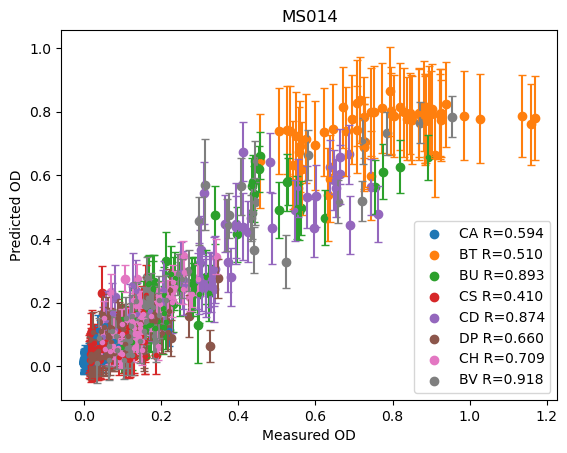

Total samples: 66, Initial regularization: 1.00e-03
Loss: 8.749, Residuals: -0.368
Loss: 4.368, Residuals: 0.045
Loss: 4.001, Residuals: 0.014
Loss: 3.319, Residuals: 0.015
Loss: 2.204, Residuals: 0.045
Loss: 2.047, Residuals: -0.014
Loss: 1.867, Residuals: 0.010
Loss: 1.811, Residuals: 0.046
Loss: 1.717, Residuals: 0.036
Loss: 1.598, Residuals: 0.017
Loss: 1.583, Residuals: 0.020
Loss: 1.572, Residuals: 0.020
Loss: 1.551, Residuals: 0.016
Loss: 1.518, Residuals: 0.009
Loss: 1.517, Residuals: 0.012
Loss: 1.515, Residuals: 0.012
Loss: 1.498, Residuals: 0.006
Loss: 1.497, Residuals: 0.009
Loss: 1.493, Residuals: 0.007
Loss: 1.488, Residuals: 0.004
Loss: 1.486, Residuals: 0.004
Loss: 1.485, Residuals: 0.005
Loss: 1.479, Residuals: -0.000
Loss: 1.479, Residuals: 0.000
Loss: 1.477, Residuals: -0.002
Loss: 1.475, Residuals: -0.003
Loss: 1.473, Residuals: -0.005
Loss: 1.473, Residuals: -0.004
Loss: 1.471, Residuals: -0.005
Loss: 1.468, Residuals: -0.008
Loss: 1.468, Residuals: -0.008
Loss: 1.

Total samples: 69, Initial regularization: 1.00e-03
Loss: 8.982, Residuals: -0.383
Loss: 4.242, Residuals: 0.024
Loss: 2.896, Residuals: 0.031
Loss: 2.341, Residuals: 0.030
Loss: 2.089, Residuals: 0.006
Loss: 1.952, Residuals: 0.012
Loss: 1.859, Residuals: 0.035
Loss: 1.715, Residuals: 0.023
Loss: 1.677, Residuals: 0.027
Loss: 1.613, Residuals: 0.019
Loss: 1.601, Residuals: 0.030
Loss: 1.579, Residuals: 0.026
Loss: 1.543, Residuals: 0.016
Loss: 1.541, Residuals: 0.014
Loss: 1.520, Residuals: 0.008
Loss: 1.516, Residuals: 0.011
Loss: 1.509, Residuals: 0.008
Loss: 1.498, Residuals: 0.001
Loss: 1.498, Residuals: 0.002
Loss: 1.496, Residuals: 0.001
Loss: 1.494, Residuals: -0.000
Loss: 1.491, Residuals: -0.004
Loss: 1.490, Residuals: -0.003
Loss: 1.489, Residuals: -0.004
Loss: 1.487, Residuals: -0.006
Loss: 1.487, Residuals: -0.007
Loss: 1.483, Residuals: -0.009
Loss: 1.483, Residuals: -0.011
Loss: 1.482, Residuals: -0.011
Loss: 1.481, Residuals: -0.011
Loss: 1.480, Residuals: -0.012
Loss: 

Loss: 261.210, Residuals: 0.014
Optimization terminated successfully.
Evidence 1101.161
Updating hyper-parameters...
Total samples: 67, Updated regularization: 1.80e+00
Loss: 263.827, Residuals: 0.013
Loss: 263.704, Residuals: 0.010
Loss: 263.490, Residuals: 0.010
Loss: 263.375, Residuals: 0.010
Loss: 263.335, Residuals: 0.010
Loss: 263.264, Residuals: 0.010
Loss: 263.168, Residuals: 0.009
Loss: 263.167, Residuals: 0.009
Optimization terminated successfully.
Evidence 1102.728
Updating hyper-parameters...
Total samples: 67, Updated regularization: 1.83e+00
Loss: 264.058, Residuals: 0.010
Optimization terminated successfully.
Evidence 1103.547
Pass count  1
Total samples: 69, Initial regularization: 1.00e-03
Loss: 9.115, Residuals: -0.382
Loss: 4.366, Residuals: 0.038
Loss: 4.141, Residuals: 0.022
Loss: 3.712, Residuals: 0.020
Loss: 2.927, Residuals: 0.020
Loss: 2.365, Residuals: 0.016
Loss: 2.050, Residuals: 0.022
Loss: 2.010, Residuals: 0.056
Loss: 1.937, Residuals: 0.048
Loss: 1.812, 

Loss: 4.369, Residuals: 0.041
Loss: 4.126, Residuals: 0.026
Loss: 3.663, Residuals: 0.024
Loss: 2.818, Residuals: 0.024
Loss: 2.332, Residuals: 0.023
Loss: 2.019, Residuals: 0.027
Loss: 1.980, Residuals: 0.065
Loss: 1.909, Residuals: 0.057
Loss: 1.795, Residuals: 0.038
Loss: 1.775, Residuals: 0.049
Loss: 1.739, Residuals: 0.042
Loss: 1.681, Residuals: 0.029
Loss: 1.673, Residuals: 0.031
Loss: 1.657, Residuals: 0.027
Loss: 1.631, Residuals: 0.019
Loss: 1.623, Residuals: 0.015
Loss: 1.607, Residuals: 0.010
Loss: 1.606, Residuals: 0.011
Loss: 1.598, Residuals: 0.007
Loss: 1.585, Residuals: -0.001
Loss: 1.584, Residuals: 0.002
Loss: 1.583, Residuals: 0.001
Loss: 1.581, Residuals: -0.001
Loss: 1.579, Residuals: -0.002
Loss: 1.576, Residuals: -0.005
Loss: 1.571, Residuals: -0.009
Loss: 1.571, Residuals: -0.007
Loss: 1.570, Residuals: -0.009
Loss: 1.567, Residuals: -0.010
Loss: 1.567, Residuals: -0.012
Loss: 1.565, Residuals: -0.013
Loss: 1.563, Residuals: -0.014
Loss: 1.563, Residuals: -0.01

Loss: 123.137, Residuals: 0.005
Optimization terminated successfully.
Evidence 995.254
Updating hyper-parameters...
Total samples: 68, Updated regularization: 8.23e-01
Loss: 224.019, Residuals: 0.016
Loss: 223.039, Residuals: 0.013
Loss: 222.378, Residuals: 0.007
Loss: 221.862, Residuals: 0.006
Loss: 221.742, Residuals: 0.003
Loss: 221.538, Residuals: 0.003
Loss: 221.506, Residuals: 0.005
Loss: 221.204, Residuals: 0.004
Loss: 221.194, Residuals: 0.004
Optimization terminated successfully.
Evidence 1084.999
Updating hyper-parameters...
Total samples: 68, Updated regularization: 9.72e-01
Loss: 256.371, Residuals: 0.010
Loss: 255.901, Residuals: 0.006
Loss: 255.390, Residuals: 0.004
Loss: 254.884, Residuals: -0.000
Loss: 254.850, Residuals: -0.000
Loss: 254.532, Residuals: -0.001
Loss: 253.972, Residuals: -0.000
Loss: 253.947, Residuals: -0.000
Optimization terminated successfully.
Evidence 1099.032
Updating hyper-parameters...
Total samples: 68, Updated regularization: 1.15e+00
Loss: 263

Loss: 213.864, Residuals: 0.026
Loss: 213.348, Residuals: 0.022
Loss: 212.450, Residuals: 0.021
Loss: 211.314, Residuals: 0.017
Loss: 211.279, Residuals: 0.018
Optimization terminated successfully.
Evidence 1071.984
Updating hyper-parameters...
Total samples: 67, Updated regularization: 2.21e+00
Loss: 251.726, Residuals: 0.017
Loss: 251.108, Residuals: 0.012
Loss: 250.682, Residuals: 0.010
Loss: 250.222, Residuals: 0.009
Loss: 250.180, Residuals: 0.009
Optimization terminated successfully.
Evidence 1091.042
Updating hyper-parameters...
Total samples: 67, Updated regularization: 2.06e+00
Loss: 260.691, Residuals: 0.013
Optimization terminated successfully.
Evidence 1094.027
Updating hyper-parameters...
Total samples: 67, Updated regularization: 2.08e+00
Loss: 263.153, Residuals: 0.007
Loss: 262.959, Residuals: 0.007
Loss: 262.785, Residuals: 0.006
Loss: 262.777, Residuals: 0.005
Optimization terminated successfully.
Evidence 1095.536
Updating hyper-parameters...
Total samples: 67, Updat

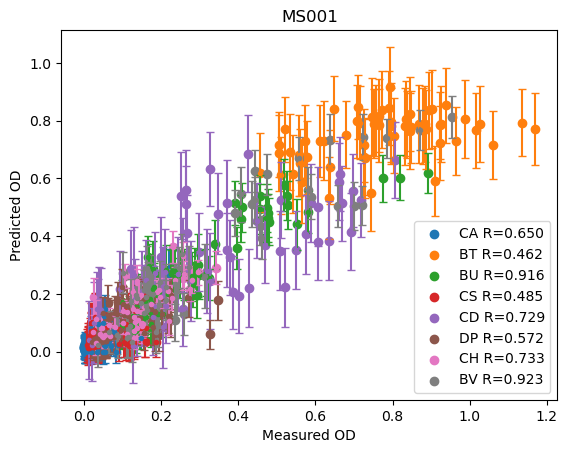

Total samples: 66, Initial regularization: 1.00e-03
Loss: 8.853, Residuals: -0.376
Loss: 4.677, Residuals: 0.086
Loss: 4.223, Residuals: 0.034
Loss: 3.415, Residuals: 0.026
Loss: 2.386, Residuals: 0.041
Loss: 2.257, Residuals: 0.006
Loss: 2.071, Residuals: 0.003
Loss: 1.907, Residuals: -0.001
Loss: 1.883, Residuals: -0.003
Loss: 1.848, Residuals: -0.002
Loss: 1.819, Residuals: -0.004
Loss: 1.771, Residuals: -0.007
Loss: 1.763, Residuals: 0.003
Loss: 1.747, Residuals: -0.001
Loss: 1.721, Residuals: -0.008
Loss: 1.694, Residuals: -0.023
Loss: 1.690, Residuals: -0.016
Loss: 1.686, Residuals: -0.019
Loss: 1.677, Residuals: -0.023
Loss: 1.674, Residuals: -0.025
Loss: 1.669, Residuals: -0.027
Loss: 1.659, Residuals: -0.031
Loss: 1.658, Residuals: -0.031
Loss: 1.648, Residuals: -0.034
Loss: 1.644, Residuals: -0.033
Loss: 1.638, Residuals: -0.037
Loss: 1.626, Residuals: -0.040
Loss: 1.619, Residuals: -0.040
Loss: 1.618, Residuals: -0.041
Loss: 1.611, Residuals: -0.042
Loss: 1.611, Residuals: -

Loss: 1.551, Residuals: -0.041
Loss: 1.550, Residuals: -0.042
Loss: 1.549, Residuals: -0.042
Loss: 1.548, Residuals: -0.043
Loss: 1.548, Residuals: -0.042
Loss: 1.546, Residuals: -0.043
Loss: 1.544, Residuals: -0.044
Loss: 1.544, Residuals: -0.043
Loss: 1.543, Residuals: -0.044
Loss: 1.543, Residuals: -0.044
Loss: 1.542, Residuals: -0.044
Loss: 1.542, Residuals: -0.045
Loss: 1.542, Residuals: -0.045
Loss: 1.542, Residuals: -0.045
Loss: 1.541, Residuals: -0.045
Loss: 1.541, Residuals: -0.045
Loss: 1.541, Residuals: -0.045
Loss: 1.541, Residuals: -0.045
Loss: 1.541, Residuals: -0.045
Loss: 1.541, Residuals: -0.046
Loss: 1.541, Residuals: -0.046
Loss: 1.541, Residuals: -0.046
Loss: 1.541, Residuals: -0.046
Loss: 1.541, Residuals: -0.046
Loss: 1.541, Residuals: -0.046
Loss: 1.541, Residuals: -0.046
Loss: 1.541, Residuals: -0.046
Loss: 1.541, Residuals: -0.046
Loss: 1.541, Residuals: -0.046
Loss: 1.541, Residuals: -0.046
Loss: 1.541, Residuals: -0.046
Loss: 1.541, Residuals: -0.046
Loss: 1.

Loss: 262.711, Residuals: -0.007
Loss: 262.696, Residuals: -0.006
Optimization terminated successfully.
Evidence 1095.761
Updating hyper-parameters...
Total samples: 67, Updated regularization: 1.89e+00
Loss: 263.442, Residuals: -0.006
Loss: 263.132, Residuals: -0.006
Loss: 263.128, Residuals: -0.006
Optimization terminated successfully.
Evidence 1096.507
Pass count  1
Total samples: 66, Initial regularization: 1.00e-03
Loss: 8.939, Residuals: -0.392
Loss: 4.311, Residuals: 0.019
Loss: 2.818, Residuals: 0.068
Loss: 2.500, Residuals: -0.029
Loss: 2.112, Residuals: -0.013
Loss: 2.040, Residuals: -0.024
Loss: 1.921, Residuals: -0.015
Loss: 1.790, Residuals: -0.010
Loss: 1.761, Residuals: 0.004
Loss: 1.746, Residuals: -0.005
Loss: 1.720, Residuals: -0.010
Loss: 1.682, Residuals: -0.021
Loss: 1.682, Residuals: -0.018
Loss: 1.676, Residuals: -0.019
Loss: 1.667, Residuals: -0.023
Loss: 1.663, Residuals: -0.023
Loss: 1.656, Residuals: -0.026
Loss: 1.652, Residuals: -0.029
Loss: 1.644, Residual

Total samples: 67, Updated regularization: 2.10e+00
Loss: 256.189, Residuals: -0.003
Loss: 255.936, Residuals: -0.006
Loss: 255.603, Residuals: -0.007
Loss: 255.538, Residuals: -0.009
Loss: 255.419, Residuals: -0.009
Loss: 255.228, Residuals: -0.009
Loss: 255.225, Residuals: -0.009
Optimization terminated successfully.
Evidence 1081.670
Updating hyper-parameters...
Total samples: 67, Updated regularization: 2.17e+00
Loss: 263.340, Residuals: -0.008
Loss: 263.221, Residuals: -0.008
Loss: 263.026, Residuals: -0.009
Loss: 262.969, Residuals: -0.010
Loss: 262.959, Residuals: -0.009
Optimization terminated successfully.
Evidence 1084.192
Updating hyper-parameters...
Total samples: 67, Updated regularization: 2.22e+00
Loss: 265.048, Residuals: -0.009
Loss: 264.923, Residuals: -0.010
Loss: 264.788, Residuals: -0.011
Loss: 264.786, Residuals: -0.011
Optimization terminated successfully.
Evidence 1085.457
Updating hyper-parameters...
Total samples: 67, Updated regularization: 2.27e+00
Loss: 265

Loss: 1.519, Residuals: -0.033
Loss: 1.517, Residuals: -0.034
Loss: 1.517, Residuals: -0.034
Loss: 1.517, Residuals: -0.034
Loss: 1.516, Residuals: -0.035
Loss: 1.515, Residuals: -0.036
Loss: 1.515, Residuals: -0.036
Loss: 1.514, Residuals: -0.036
Loss: 1.514, Residuals: -0.037
Loss: 1.513, Residuals: -0.037
Loss: 1.513, Residuals: -0.037
Loss: 1.513, Residuals: -0.037
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Loss: 1.512, Residuals: -0.038
Evidence -45.105
Updating hyper-parameters...
Total samples: 66, Updat

Loss: 259.207, Residuals: -0.016
Loss: 259.203, Residuals: -0.016
Optimization terminated successfully.
Evidence 1066.605
Updating hyper-parameters...
Total samples: 66, Updated regularization: 2.49e+00
Loss: 260.105, Residuals: -0.016
Loss: 260.025, Residuals: -0.016
Loss: 259.973, Residuals: -0.017
Loss: 259.969, Residuals: -0.017
Optimization terminated successfully.
Evidence 1067.440
Pass count  1
Total samples: 68, Initial regularization: 1.00e-03
Loss: 9.134, Residuals: -0.392
Loss: 4.886, Residuals: 0.081
Loss: 4.371, Residuals: 0.031
Loss: 3.484, Residuals: 0.024
Loss: 2.430, Residuals: 0.039
Loss: 2.295, Residuals: -0.003
Loss: 2.098, Residuals: 0.005
Loss: 2.050, Residuals: 0.003
Loss: 1.965, Residuals: 0.000
Loss: 1.828, Residuals: -0.005
Loss: 1.806, Residuals: 0.009
Loss: 1.765, Residuals: 0.004
Loss: 1.700, Residuals: -0.006
Loss: 1.686, Residuals: -0.004
Loss: 1.663, Residuals: -0.009
Loss: 1.661, Residuals: -0.003
Loss: 1.640, Residuals: -0.011
Loss: 1.636, Residuals: -

Loss: 258.348, Residuals: -0.016
Loss: 256.135, Residuals: -0.006
Loss: 255.775, Residuals: -0.013
Optimization terminated successfully.
Evidence 1071.770
Updating hyper-parameters...
Total samples: 68, Updated regularization: 1.44e+00
Loss: 263.145, Residuals: -0.010
Loss: 262.628, Residuals: -0.011
Loss: 262.471, Residuals: -0.011
Loss: 261.148, Residuals: -0.013
Loss: 261.126, Residuals: -0.012
Optimization terminated successfully.
Evidence 1078.626
Updating hyper-parameters...
Total samples: 68, Updated regularization: 1.70e+00
Loss: 265.275, Residuals: -0.012
Loss: 264.996, Residuals: -0.012
Loss: 264.738, Residuals: -0.013
Loss: 264.672, Residuals: -0.014
Loss: 264.126, Residuals: -0.014
Loss: 264.120, Residuals: -0.013
Optimization terminated successfully.
Evidence 1081.138
Updating hyper-parameters...
Total samples: 68, Updated regularization: 1.88e+00
Loss: 265.840, Residuals: -0.012
Loss: 265.623, Residuals: -0.013
Loss: 265.616, Residuals: -0.013
Optimization terminated succ

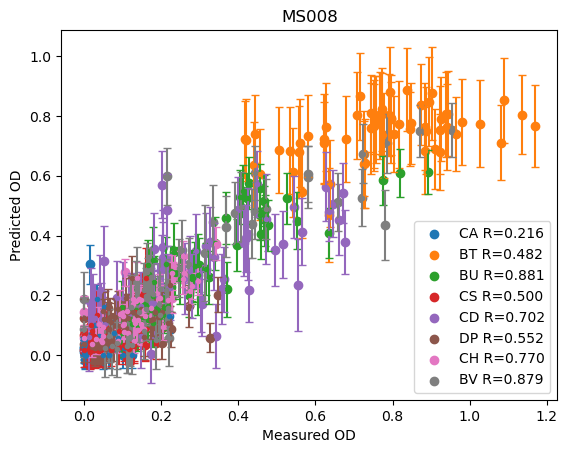

Total samples: 64, Initial regularization: 1.00e-03
Loss: 9.523, Residuals: -0.405
Loss: 5.533, Residuals: 0.141
Loss: 4.709, Residuals: 0.069
Loss: 3.369, Residuals: 0.054
Loss: 2.710, Residuals: 0.040
Loss: 2.477, Residuals: 0.028
Loss: 2.321, Residuals: 0.032
Loss: 2.075, Residuals: 0.024
Loss: 1.986, Residuals: 0.025
Loss: 1.928, Residuals: 0.026
Loss: 1.841, Residuals: 0.010
Loss: 1.748, Residuals: -0.011
Loss: 1.745, Residuals: -0.008
Loss: 1.739, Residuals: -0.009
Loss: 1.727, Residuals: -0.010
Loss: 1.718, Residuals: -0.016
Loss: 1.700, Residuals: -0.019
Loss: 1.698, Residuals: -0.015
Loss: 1.679, Residuals: -0.019
Loss: 1.674, Residuals: -0.017
Loss: 1.671, Residuals: -0.012
Loss: 1.654, Residuals: -0.017
Loss: 1.653, Residuals: -0.020
Loss: 1.640, Residuals: -0.024
Loss: 1.640, Residuals: -0.023
Loss: 1.636, Residuals: -0.024
Loss: 1.634, Residuals: -0.024
Loss: 1.632, Residuals: -0.025
Loss: 1.627, Residuals: -0.027
Loss: 1.626, Residuals: -0.026
Loss: 1.622, Residuals: -0.0

Loss: 228.017, Residuals: -0.009
Optimization terminated successfully.
Evidence 1032.295
Updating hyper-parameters...
Total samples: 66, Updated regularization: 3.14e-01
Loss: 256.264, Residuals: -0.008
Loss: 256.147, Residuals: -0.011
Loss: 255.936, Residuals: -0.011
Loss: 255.598, Residuals: -0.012
Loss: 255.534, Residuals: -0.013
Loss: 255.417, Residuals: -0.013
Loss: 255.401, Residuals: -0.012
Loss: 254.781, Residuals: -0.013
Loss: 254.767, Residuals: -0.013
Optimization terminated successfully.
Evidence 1039.467
Updating hyper-parameters...
Total samples: 66, Updated regularization: 2.81e-01
Loss: 261.111, Residuals: -0.014
Loss: 261.008, Residuals: -0.014
Loss: 260.957, Residuals: -0.014
Loss: 260.935, Residuals: -0.014
Loss: 260.080, Residuals: -0.014
Loss: 260.063, Residuals: -0.015
Loss: 259.429, Residuals: -0.015
Loss: 259.364, Residuals: -0.014
Loss: 259.345, Residuals: -0.014
Loss: 258.674, Residuals: -0.015
Loss: 258.667, Residuals: -0.015
Optimization terminated successfu

Loss: 1.493, Residuals: -0.036
Loss: 1.492, Residuals: -0.036
Loss: 1.491, Residuals: -0.036
Loss: 1.490, Residuals: -0.036
Loss: 1.489, Residuals: -0.037
Loss: 1.488, Residuals: -0.036
Loss: 1.488, Residuals: -0.037
Loss: 1.488, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Loss: 1.487, Residuals: -0.037
Evidence -48.471
Updating hyper-parameters...
Total samples: 66, Updated regularization: 3.60e-01
Loss: 32.220, Residuals: -0.022
Loss: 31.671, Residuals: -0.018
Loss: 31.498, Residuals: -0.014
Loss: 31.173, Residuals: -0.012

Loss: 2.275, Residuals: 0.015
Loss: 1.972, Residuals: 0.007
Loss: 1.898, Residuals: 0.023
Loss: 1.847, Residuals: 0.022
Loss: 1.781, Residuals: 0.011
Loss: 1.712, Residuals: -0.008
Loss: 1.703, Residuals: -0.009
Loss: 1.692, Residuals: -0.010
Loss: 1.673, Residuals: -0.013
Loss: 1.643, Residuals: -0.016
Loss: 1.642, Residuals: -0.014
Loss: 1.641, Residuals: -0.014
Loss: 1.628, Residuals: -0.018
Loss: 1.625, Residuals: -0.019
Loss: 1.624, Residuals: -0.015
Loss: 1.616, Residuals: -0.019
Loss: 1.615, Residuals: -0.019
Loss: 1.609, Residuals: -0.022
Loss: 1.609, Residuals: -0.022
Loss: 1.606, Residuals: -0.023
Loss: 1.601, Residuals: -0.026
Loss: 1.601, Residuals: -0.026
Loss: 1.601, Residuals: -0.026
Loss: 1.600, Residuals: -0.026
Loss: 1.599, Residuals: -0.027
Loss: 1.597, Residuals: -0.028
Loss: 1.596, Residuals: -0.028
Loss: 1.594, Residuals: -0.029
Loss: 1.593, Residuals: -0.030
Loss: 1.591, Residuals: -0.031
Loss: 1.587, Residuals: -0.032
Loss: 1.587, Residuals: -0.033
Loss: 1.583, 

Loss: 4.642, Residuals: 0.044
Loss: 4.387, Residuals: 0.034
Loss: 3.904, Residuals: 0.030
Loss: 3.030, Residuals: 0.025
Loss: 2.401, Residuals: 0.021
Loss: 2.132, Residuals: 0.008
Loss: 1.982, Residuals: 0.010
Loss: 1.849, Residuals: 0.008
Loss: 1.821, Residuals: 0.021
Loss: 1.770, Residuals: 0.014
Loss: 1.691, Residuals: 0.001
Loss: 1.674, Residuals: -0.005
Loss: 1.645, Residuals: -0.010
Loss: 1.633, Residuals: -0.006
Loss: 1.632, Residuals: -0.004
Loss: 1.611, Residuals: -0.009
Loss: 1.581, Residuals: -0.019
Loss: 1.580, Residuals: -0.019
Loss: 1.579, Residuals: -0.015
Loss: 1.569, Residuals: -0.018
Loss: 1.567, Residuals: -0.021
Loss: 1.565, Residuals: -0.022
Loss: 1.560, Residuals: -0.024
Loss: 1.552, Residuals: -0.027
Loss: 1.552, Residuals: -0.027
Loss: 1.552, Residuals: -0.027
Loss: 1.552, Residuals: -0.027
Loss: 1.552, Residuals: -0.026
Loss: 1.549, Residuals: -0.028
Loss: 1.548, Residuals: -0.028
Loss: 1.546, Residuals: -0.029
Loss: 1.543, Residuals: -0.031
Loss: 1.543, Residu

Loss: 1.617, Residuals: -0.030
Loss: 1.609, Residuals: -0.030
Loss: 1.608, Residuals: -0.026
Loss: 1.603, Residuals: -0.028
Loss: 1.602, Residuals: -0.029
Loss: 1.594, Residuals: -0.031
Loss: 1.594, Residuals: -0.031
Loss: 1.593, Residuals: -0.030
Loss: 1.589, Residuals: -0.033
Loss: 1.589, Residuals: -0.032
Loss: 1.588, Residuals: -0.032
Loss: 1.587, Residuals: -0.033
Loss: 1.586, Residuals: -0.032
Loss: 1.585, Residuals: -0.034
Loss: 1.585, Residuals: -0.034
Loss: 1.585, Residuals: -0.034
Loss: 1.584, Residuals: -0.034
Loss: 1.584, Residuals: -0.035
Loss: 1.584, Residuals: -0.034
Loss: 1.584, Residuals: -0.035
Loss: 1.584, Residuals: -0.035
Loss: 1.584, Residuals: -0.035
Loss: 1.583, Residuals: -0.035
Loss: 1.583, Residuals: -0.035
Loss: 1.583, Residuals: -0.035
Loss: 1.583, Residuals: -0.035
Loss: 1.583, Residuals: -0.035
Loss: 1.583, Residuals: -0.035
Loss: 1.583, Residuals: -0.035
Loss: 1.583, Residuals: -0.035
Loss: 1.583, Residuals: -0.035
Loss: 1.583, Residuals: -0.035
Loss: 1.

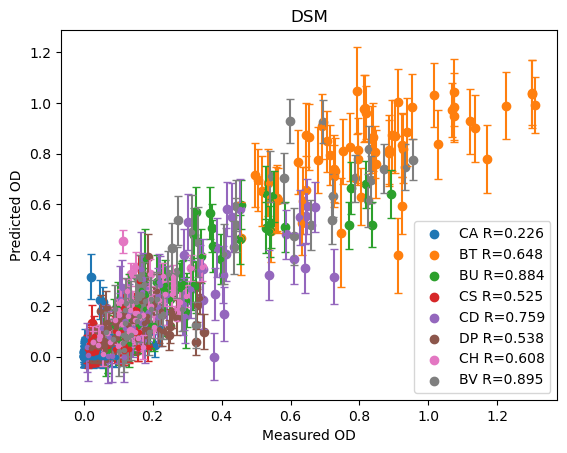

In [4]:
# run kfold for each file 
for file in files:
    
    # import data
    df = pd.read_csv(f"data/{file}")

    # determine species names 
    species = df.columns.values[2:]

    # separate mono culture data 
    mono_df = pd.concat([df_i for name, df_i in df.groupby("Treatments") if "Mono" in name])
    dfs = [df_i for name, df_i in df.groupby("Treatments") if "Mono" not in name]

    # init kfold object
    kf = KFold(n_splits=10, shuffle=True, random_state=21)

    # keep track of all predictions
    all_exp_names = []
    all_pred_species = []
    all_true = []
    all_pred = []
    all_stdv = []

    # run Kfold 
    for train_index, test_index in kf.split(dfs):
        #train_index, test_index = next(iter(kf.split(dfs)))

        # get train df 
        train_df = pd.concat([dfs[i] for i in train_index])
        train_df = pd.concat((mono_df, train_df))

        # get test df
        test_df = pd.concat([dfs[i] for i in test_index])

        # instantiate gLV fit 
        model = gLV(species, train_df)

        # fit to data 
        model.fit()

        # plot fitness to data
        exp_names, pred_species, true, pred, stdv = predict_df(test_df, species)

        # append predictions 
        all_exp_names = np.append(all_exp_names, exp_names)
        all_pred_species = np.append(all_pred_species, pred_species)
        all_true = np.append(all_true, true)
        all_pred = np.append(all_pred, pred)
        all_stdv = np.append(all_stdv, stdv)

        # save prediction results to a .csv
        strain = file.split("_")[0]
        kfold_df = pd.DataFrame()
        kfold_df['Treatments'] = all_exp_names
        kfold_df['species'] = all_pred_species
        kfold_df['true'] = all_true
        kfold_df['pred'] = all_pred
        kfold_df['stdv'] = all_stdv
        kfold_df.to_csv(f"kfold/{strain}_kfold.csv", index=False)
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain)
    plt.savefig(f"figures/{strain}_kfold.pdf", dpi=300)
    plt.show()

In [5]:
kfold_df

Treatments species      true      pred      stdv
0             CH-DP-BV-CA      CA  0.002133  0.019981  0.041876
1             CH-DP-BV-CA      DP  0.037247  0.063593  0.061022
2             CH-DP-BV-CA      CH  0.235187  0.247695  0.050485
3             CH-DP-BV-CA      BV  0.786432  0.702339  0.091851
4             CH-DP-BV-CA      CA  0.036395  0.043558  0.046013
..                    ...     ...       ...       ...       ...
509  DSM27147-DP-BT-BV-CA      CA  0.028325  0.021289  0.035401
510  DSM27147-DP-BT-BV-CA      BT  0.816925  0.980068  0.128908
511  DSM27147-DP-BT-BV-CA      CD  0.119845  0.139717  0.112732
512  DSM27147-DP-BT-BV-CA      DP  0.175360  0.133916  0.062000
513  DSM27147-DP-BT-BV-CA      BV  0.101545  0.020288  0.096091

[514 rows x 5 columns]

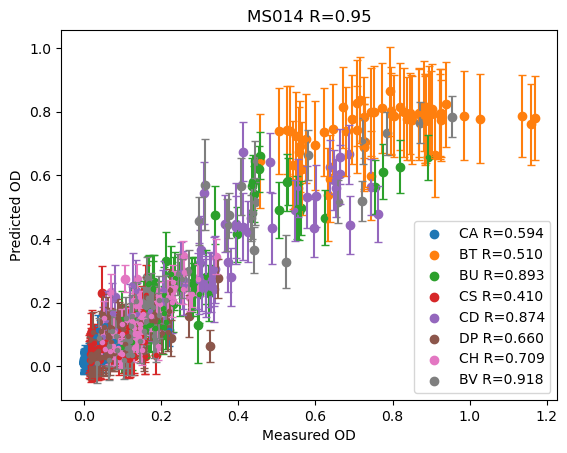

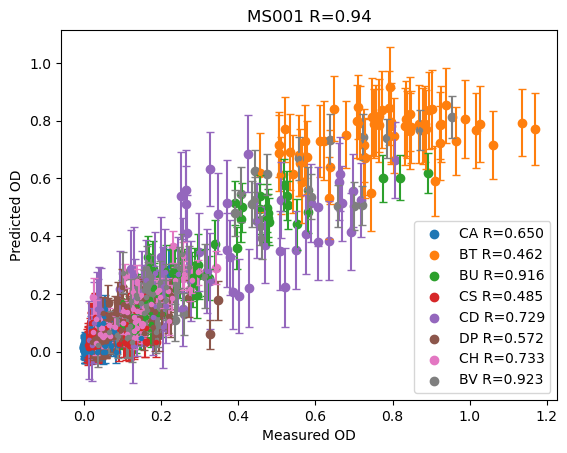

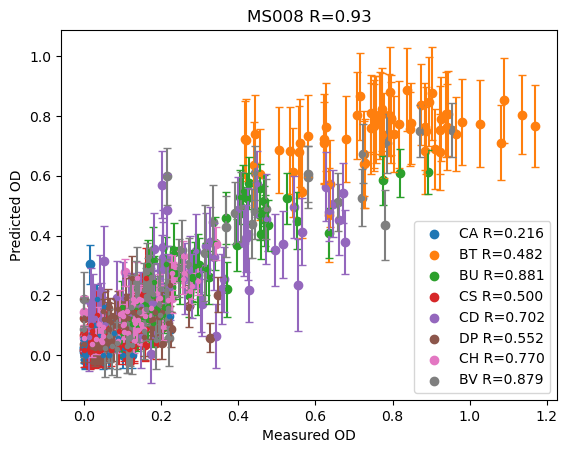

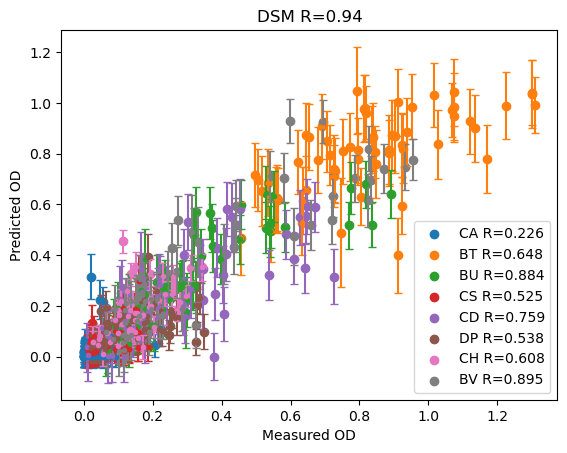

In [6]:
for file in files:
    
    # import data
    df = pd.read_csv(f"data/{file}")

    # determine species names 
    species = df.columns.values[2:]
    
    strain = file.split("_")[0]
    kfold_df = pd.read_csv(f"kfold/{strain}_kfold.csv")
        
    all_pred_species = kfold_df['species'].values
    all_true = kfold_df['true'].values 
    all_pred = kfold_df['pred'].values
    all_stdv = kfold_df['stdv'].values
        
    R_overall = linregress(all_true, all_pred).rvalue
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain + " R={:.2f}".format(R_overall))
    plt.savefig(f"figures/{strain}_kfold.pdf", dpi=300)
    plt.show()